In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b302852130a425086b0bf9816721df0eaf13f472323a2e593ea135f3ab2b3eb8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


71.71578034682082


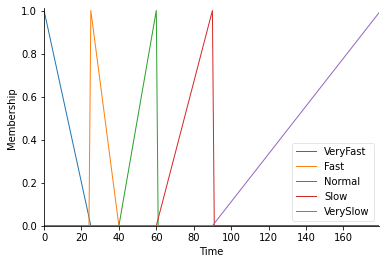

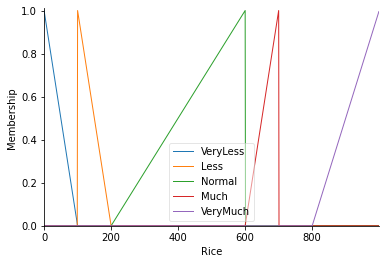

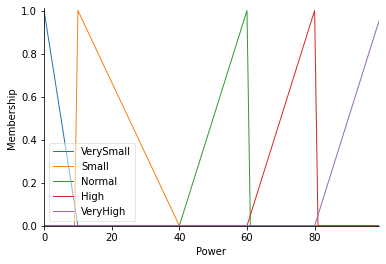

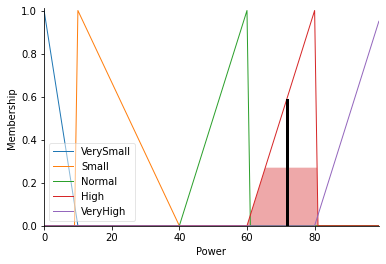

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(0,180,1),'Time')
rice = ctrl.Antecedent(np.arange(0,1000,1),'Rice')
power = ctrl.Consequent(np.arange(0,100,1),'Power')
time['VeryFast']=fuzz.trimf(time.universe,[0,0,25])
time['Fast']=fuzz.trimf(time.universe,[25,25,40])
time['Normal']=fuzz.trimf(time.universe,[40,60,60])
time['Slow']=fuzz.trimf(time.universe,[60,90,90])
time['VerySlow']=fuzz.trimf(time.universe,[90,180,180])
rice['VeryLess']=fuzz.trimf(rice.universe,[0,0,100])
rice['Less']=fuzz.trimf(rice.universe,[100,100,200])
rice['Normal']=fuzz.trimf(rice.universe,[200,600,600])
rice['Much']=fuzz.trimf(rice.universe,[600,700,700])
rice['VeryMuch']=fuzz.trimf(rice.universe,[800,1000,1000])
power['VerySmall']=fuzz.trimf(power.universe,[0,0,10])
power['Small']=fuzz.trimf(power.universe,[10,10,40])
power['Normal']=fuzz.trimf(power.universe,[40,60,60])
power['High']=fuzz.trimf(power.universe,[60,80,80])
power['VeryHigh']=fuzz.trimf(power.universe,[80,100,100])
time.view()
rice.view()
power.view()
rule1=ctrl.Rule(time['VeryFast']&rice['VeryLess'],power['VeryHigh'])
rule2=ctrl.Rule(time['VeryFast']&rice['Less'],power['VeryHigh'])
rule3=ctrl.Rule(time['VeryFast']&rice['Normal'],power['VeryHigh'])
rule4=ctrl.Rule(time['VeryFast']&rice['Much'],power['VeryHigh'])
rule5=ctrl.Rule(time['VeryFast']&rice['VeryMuch'],power['VeryHigh'])

rule6=ctrl.Rule(time['Fast']&rice['VeryLess'],power['High'])
rule7=ctrl.Rule(time['Fast']&rice['Less'],power['High'])
rule8=ctrl.Rule(time['Fast']&rice['Normal'],power['High'])
rule9=ctrl.Rule(time['Fast']&rice['Much'],power['High'])
rule10=ctrl.Rule(time['Fast']&rice['VeryMuch'],power['High'])

rule11=ctrl.Rule(time['Normal']&rice['VeryLess'],power['Normal'])
rule12=ctrl.Rule(time['Normal']&rice['Less'],power['Normal'])
rule13=ctrl.Rule(time['Normal']&rice['Normal'],power['Normal'])
rule14=ctrl.Rule(time['Normal']&rice['Much'],power['Normal'])
rule15=ctrl.Rule(time['Normal']&rice['VeryMuch'],power['Normal'])

rule16=ctrl.Rule(time['Slow']&rice['VeryLess'],power['Small'])
rule17=ctrl.Rule(time['Slow']&rice['Less'],power['Small'])
rule18=ctrl.Rule(time['Slow']&rice['Normal'],power['Small'])
rule19=ctrl.Rule(time['Slow']&rice['Much'],power['Small'])
rule20=ctrl.Rule(time['Slow']&rice['VeryMuch'],power['Small'])

rule21=ctrl.Rule(time['VerySlow']&rice['VeryLess'],power['VerySmall'])
rule22=ctrl.Rule(time['VerySlow']&rice['Less'],power['VerySmall'])
rule23=ctrl.Rule(time['VerySlow']&rice['Normal'],power['VerySmall'])
rule24=ctrl.Rule(time['VerySlow']&rice['Much'],power['VerySmall'])
rule25=ctrl.Rule(time['VerySlow']&rice['VeryMuch'],power['VerySmall'])

cooking_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['Time'] = 25
cooking.input['Rice'] = 73
cooking.compute()
print(cooking.output['Power'])
power.view(sim=cooking)